# 1. Load and Preprocess All Images

In this section, we load and preprocess all images from the specified data folder.

work with opencv package for read and resize images

## Images label

makeup image --> label 1.

no makeup image --> label 0.


In [1]:
import cv2
import numpy as np
import os

def preprocess_images(folder_path, target_size=(64, 64)):
    images = []
    labels = []

    for label, subfolder in enumerate(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, subfolder)
        
        # Check if the item is a directory
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                
                # Check if the item is a file
                if os.path.isfile(img_path):
                    img = cv2.imread(img_path)
                    try:
                        img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
                       
                    except:
                        break
                        
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels)

data_folder = 'data'

# Preprocess makeup images
makeup_images, makeup_labels = preprocess_images(os.path.join(data_folder, 'makeup'))
makeup_labels [:] = 1
# Preprocess non-makeup images
no_makeup_images, no_makeup_labels = preprocess_images(os.path.join(data_folder, 'no_makeup'))

print('Number of makeup images:', len(makeup_images))
print('Number of no-makeup images:', len(no_makeup_images))
print('Data loaded')
print(makeup_labels)
print(no_makeup_labels)

Number of makeup images: 1062
Number of no-makeup images: 445
Data loaded
[1 1 1 ... 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


## View DataSet element



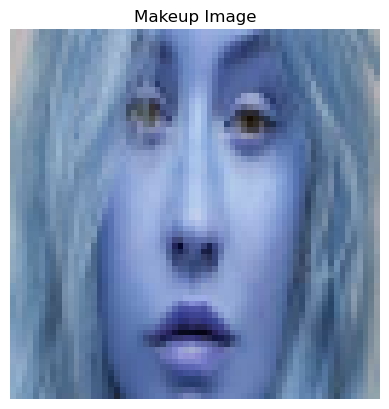

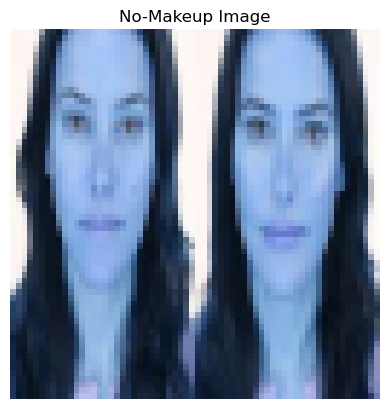

In [3]:
import matplotlib.pyplot as plt

# Display makeup image
plt.imshow(makeup_images[10])
plt.title('Makeup Image')
plt.axis('off')
plt.show()

# Display non-makeup image
plt.imshow(no_makeup_images[9])
plt.title('No-Makeup Image')
plt.axis('off')
plt.show()


# 2. Data Splite 

In this section, we will explain how data is divided into training and testing sets using the `sklearn.model_selection` library.

When working with machine learning models, it's crucial to have separate datasets for training and testing to evaluate the model's performance on unseen data. The `train_test_split` function from `sklearn.model_selection` simplifies this process.


In [4]:
from sklearn.model_selection import train_test_split

# Concatenate the makeup and non-makeup data
all_images = np.concatenate([makeup_images, no_makeup_images])
all_labels = np.concatenate([makeup_labels, no_makeup_labels])

# Split the dataset into training (70%), validation (10%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/2, random_state=42)

# Flatten and normalize
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_val = X_val.reshape(X_val.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = y_train.reshape(y_train.shape[0], 1).T
y_val = y_val.reshape(y_val.shape[0], 1).T
y_test = y_test.reshape(y_test.shape[0], 1).T

X_train = X_train.T
X_val = X_val.T
X_test = X_test.T


print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)
print("Training set shape:", y_train.shape)
print("Validation set shape:", y_val.shape)
print("Testing set shape:", y_test.shape)


Training set shape: (12288, 1205)
Validation set shape: (12288, 151)
Testing set shape: (12288, 151)
Training set shape: (1, 1205)
Validation set shape: (1, 151)
Testing set shape: (1, 151)


# 3.Backpropagation Algorithm

3.1  Definition of layers and the number of neurons

In [4]:
layers_dims = [12288,64, 1] #  2-layer model

3.2 Definition of activation functions and Its derivation 

Sigmoid  ,   ReLU

In [5]:
import numpy as np

def sigmoid(x):
    A = 1 / (1 + np.exp(-x))
    return A, x

def sigmoid_backward(grad_output, cached_output):
    sigmoid_output,f = sigmoid(cached_output)
    return grad_output * sigmoid_output *(1 - sigmoid_output)


def relu(x):
    A = np.maximum(0, x)
    return A, x

def relu_backward(grad_output, cached_output):
    relu_gradient = np.where(cached_output > 0, 1, 0)
    return grad_output * relu_gradient


## Linear Forward Function

The `linear_forward` function computes the linear transformation of input data.

The linear transformation is computed using the formula: Z=WA+b.
The function returns the linear transformation result Z 

cache tuple for storing intermediate values needed during backward propagation.
This function is a crucial step in the forward propa

In [6]:
def linear_forward(A, W, b):
    Z = np.dot(W,A)+ b
    cache = (A, W, b)
    return Z, cache

## Linear Activation Forward Function

The `linear_activation_forward` function combines the linear forward step with an activation function.

### Inputs:

A_prev: Input data (activations) from the previous layer.

W: Weight matrix for the current layer.

b: Bias vector for the current layer.

activation: Type of activation function to be applied ("sigmoid" or "relu").

### Outputs:

A: Activation output.

cache: Tuple containing (linear_cache, activation_cache) for later use in backward propagation.


In [7]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache

# Initialize Parameters Deep Function

The `initialize_parameters_deep` function initializes the weights and biases for all layers in a deep neural network.

initializes weights (W) using small random values and biases (b) as zeros.

The loop iterates over the layers and creates entries in the parameters dictionary for each layer.

In [8]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))     

        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

# L Model Forward Function

The `L_model_forward` function performs forward propagation for a deep neural network.

caches is a list that stores the caches (tuples of values) from each layer's forward propagation.

The loop iterates over the hidden layers, applying the linear activation (LINEAR -> RELU) for each layer.

The last layer uses the sigmoid activation (LINEAR -> SIGMOID).

The function returns the final output AL and the list of caches for later use in backpropagation.

In [9]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2      # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu")
        caches.append(cache)        
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid")
    caches.append(cache)
    
    return AL, caches

## Compute Cost Function

The `compute_cost` function calculates the cross-entropy cost for the neural network.


<a name='ex-6'></a>
### compute_cost
Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [10]:
def compute_cost(AL, Y):

    m = Y.shape[1]
   
    cost = -(1/m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL), axis=1, keepdims=True) 
    
    cost = np.squeeze(cost)  # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17)  
    return cost

## Linear Backward

The `linear_backward` function computes the gradient of the loss with respect to the parameters in a linear layer.

m is the number of examples.

dW and db are gradients of the loss with respect to W and b, respectively.

dA_prev is the gradient of the loss with respect to the activation of the previous 


In [11]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

## Linear Activation Backward

The `linear_activation_backward` function computes the gradients of the loss with respect to the parameters and the activation of the previous layer for a given layer.


In [12]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":

        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    
    return dA_prev, dW, db

## L Model Backward

The `L_model_backward` function computes the gradients of the loss with respect to the parameters for the entire network using backward propagation.

### Inputs:

AL: Probability vector, output of the forward propagation (L_model_forward).

Y: True "label" vector (containing 0 if non-makeup, 1 if makeup).

caches: List of caches containing every cache of linear_activation_forward().

### Outputs:

grads: A dictionary with gradients of the loss with respect to the parameters.

In [13]:
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L - 1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, "sigmoid")
    grads["dA" + str(L - 1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp


    return grads

## Update Parameters

The `update_parameters` function updates the model parameters using gradient descent.


In [14]:
import copy
def update_parameters(params, grads, learning_rate):
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):

        parameters["W" + str(l + 1)] -= learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] -= learning_rate * grads["db" + str(l + 1)]
        
    return parameters

## Neural Network Training

The `L_layer_model` function is responsible for training a neural network with multiple layers using gradient descent.


In [15]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost

    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs
def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

Cost after iteration 0: 0.6986995215820128
Cost after iteration 100: 0.5975416375852614
Cost after iteration 200: 0.5902858262057755
Cost after iteration 300: 0.5833179949321752
Cost after iteration 400: 0.5766239911061429
Cost after iteration 500: 0.5689263679836494
Cost after iteration 600: 0.5596872892141489
Cost after iteration 700: 0.5485725202341019
Cost after iteration 800: 0.5392227251353743
Cost after iteration 900: 0.546461559850353
Cost after iteration 1000: 0.5430694215359881
Cost after iteration 1100: 0.5384439611701006
Cost after iteration 1200: 0.5301798984969583
Cost after iteration 1300: 0.5243805211461627
Cost after iteration 1400: 0.5175104397473663
Cost after iteration 1500: 0.5102152229160658
Cost after iteration 1600: 0.5013431531602516
Cost after iteration 1700: 0.49429533295635647
Cost after iteration 1800: 0.48671354917480575
Cost after iteration 1900: 0.4809553208332864
Cost after iteration 2000: 0.4733088829484357
Cost after iteration 2100: 0.4692944839825266

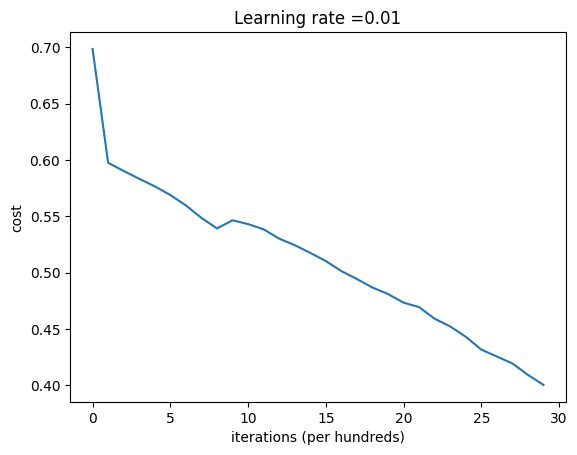

In [16]:
parameters, costs = L_layer_model(X_train, y_train, layers_dims, num_iterations = 3000, print_cost = True)
plot_costs(costs, 0.01)

## Neural Network Prediction

The `predict` function is used to make predictions on a dataset using a trained neural network.


In [37]:
def predict(X, Y, parameters):

    # Forward propagation
    AL, _ = L_model_forward(X, parameters)
    
    # Convert probabilities to binary predictions (0 or 1)
    predictions = (AL > 0.71).astype(int)

    # Calculate accuracy
    accuracy = np.mean((predictions == Y) * 100)
    print("Accuracy:", accuracy, "%")
    print("al=====" , AL)
    return predictions

pred_train = predict(X_train, y_train, parameters)

Accuracy: 85.87943848059454 %
al===== [[0.84250922 0.7953475  0.68922456 ... 0.99792369 0.70904066 0.69210649]]


In [38]:
pred_test = predict(X_test, y_test, parameters)
pred_validation = predict(X_val, y_val, parameters)

Accuracy: 68.42105263157895 %
al===== [[0.97283099 0.93102112 0.5194975  0.81967255 0.91138584 0.93589629
  0.98996577 0.95847111 0.95637853 0.96721396 0.95832984 0.97660535
  0.94228359 0.48253243 0.48772795 0.94876756 0.95738299 0.93288803
  0.90372565 0.82108021 0.89165612 0.48597298 0.98435397 0.88091602
  0.95705681 0.97135664 0.97126748 0.78532752 0.99699364 0.93774156
  0.63118736 0.9771188  0.90594542 0.75928272 0.9933322  0.87296786
  0.94744535 0.75924599 0.8897421  0.80717861 0.96835868 0.94784608
  0.89651918 0.90947834 0.98505795 0.98663755 0.97959064 0.87119543
  0.73002811 0.9754852  0.96130147 0.65897538 0.93999095 0.98010396
  0.95936582 0.82319744 0.84279862 0.85373098 0.41247552 0.93996567
  0.53177339 0.55270411 0.95206228 0.89309162 0.98091507 0.71627144
  0.86333651 0.99356096 0.86043195 0.95844223 0.98814774 0.89714622
  0.93219045 0.94206806 0.54581917 0.5605763  0.83873231 0.88180461
  0.90742696 0.9881456  0.7983194  0.87237866 0.97372977 0.98643917
  0.952243

## Predicting on a New Image

The following code block demonstrates how to use the trained neural network to make predictions on a new image.


(12288, 1)
Accuracy: 100.0 %
al===== [[0.94472117]]
y = 1.


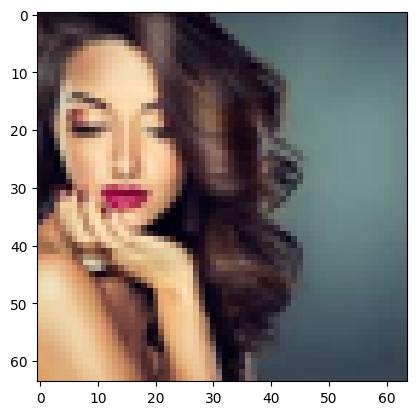

In [39]:
from PIL import Image
my_image = "nn.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class 

fname = "testimages/" + my_image
image = np.array(Image.open(fname).resize((64, 64)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, 64 * 64 * 3)).T
print(image.shape)
my_predicted_image = predict(image, my_label_y, parameters)


print ("y = " + str(np.squeeze(my_predicted_image)) + ".")

(12288, 1)
Accuracy: 100.0 %
al===== [[0.70902276]]
y = 0.


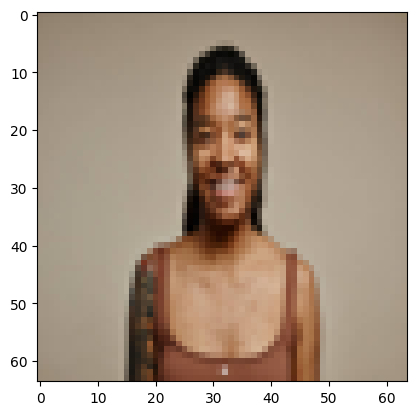

In [40]:
from PIL import Image
my_image = "no3.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class 

fname = "testimages/" + my_image
image = np.array(Image.open(fname).resize((64, 64)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, 64 * 64 * 3)).T
print(image.shape)
my_predicted_image = predict(image, my_label_y, parameters)


print ("y = " + str(np.squeeze(my_predicted_image)) + ".")

# 2.resilient Backpropagation

change updat parameters function for Resilient

In [30]:
import copy
import numpy as np

def update_parameterss(params, grads, prev_updates, learning_rate=0.1, eta_plus=1.2, eta_minus=0.5, delta_max=50.0, delta_min=1e-6):
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2

    for l in range(L):
        if l not in prev_updates:
            prev_updates[l] = {
                "dW": parameters["W" + str(l + 1)],
                "db": parameters["b" + str(l + 1)]
            }

        dW = grads["dW" + str(l + 1)]
        db = grads["db" + str(l + 1)]
        prev_dW = prev_updates[l]["dW"]
        prev_db = prev_updates[l]["db"]

        delta_W = np.multiply(np.sign(prev_dW), np.sign(dW))
        delta_W[delta_W >= 0] *= eta_plus
        delta_W[delta_W < 0] *= eta_minus


        delta_b = np.multiply(np.sign(prev_db), np.sign(db))
        delta_b[delta_b >= 0] *= eta_plus
        delta_b[delta_b < 0] *= eta_minus

        delta_W = np.clip(delta_W, delta_min, delta_max)
        delta_b = np.clip(delta_b, delta_min, delta_max)

        parameters["W" + str(l + 1)] -= learning_rate * dW * delta_W
        parameters["b" + str(l + 1)] -= learning_rate * db * delta_b


        prev_updates[l]["dW"] = delta_W
        prev_updates[l]["db"] = delta_b

    return parameters, prev_updates

In [31]:
def L_layer_modell(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost

    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)


        # Update parameters.
        prev_updates = {}
        parameters, prev_updates = update_parameterss(parameters, grads, prev_updates)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs
def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

Cost after iteration 0: 0.6986995215820128
Cost after iteration 100: 0.59123848993277
Cost after iteration 200: 0.5853965543172546
Cost after iteration 300: 0.5817401237633878
Cost after iteration 400: 0.5789520696567326
Cost after iteration 500: 0.5764697851641918
Cost after iteration 600: 0.5734429831691646
Cost after iteration 700: 0.5705952141466711
Cost after iteration 800: 0.568244993928416
Cost after iteration 900: 0.5665085223054949
Cost after iteration 1000: 0.5650942535114216
Cost after iteration 1100: 0.564452647159337
Cost after iteration 1200: 0.5640512560751288
Cost after iteration 1300: 0.5639891505537864
Cost after iteration 1400: 0.5641434322297466
Cost after iteration 1500: 0.5638428276165713
Cost after iteration 1600: 0.5634841195928221
Cost after iteration 1700: 0.5630001094794618
Cost after iteration 1800: 0.5650486544296737
Cost after iteration 1900: 0.5645614182127929
Cost after iteration 2000: 0.5641771584550783
Cost after iteration 2100: 0.5638843668719001
Cost

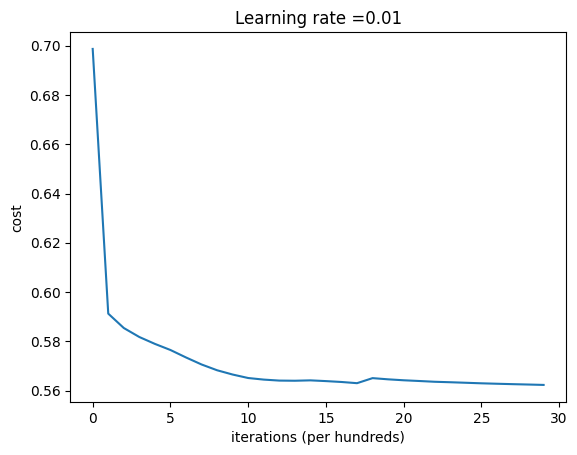

In [32]:
parameterss, costs = L_layer_modell(X_train, y_train, layers_dims, num_iterations = 3000, print_cost = True)
plot_costs(costs, 0.01)

In [33]:
def predict(X, Y, parameterss):
    # Forward propagation
    AL, _ = L_model_forward(X, parameterss)

    # Convert probabilities to binary predictions (0 or 1)
    predictions = (AL > 0.5).astype(int)

    # Calculate accuracy
    accuracy = np.mean((predictions == Y) * 100)
    print("Accuracy:", accuracy, "%")
    # print("al=====" , AL)
    return predictions

pred_train_res = predict(X_train, y_train, parameterss)

Accuracy: 71.01568951279934 %


In [34]:
pred_test_res = predict(X_test, y_test, parameterss)
pred_val_res = predict(X_val, y_val, parameterss)

Accuracy: 68.42105263157895 %
Accuracy: 68.21192052980132 %


## Predicting on a New Image

The following code block demonstrates how to use the trained neural network to make predictions on a new image.


(12288, 1)
Accuracy: 100.0 %
y = 1.


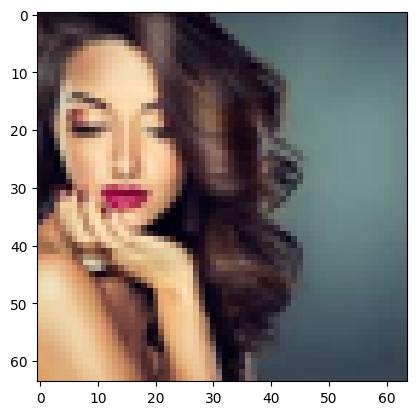

In [35]:
from PIL import Image
my_image = "nn.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class 

fname = "testimages/" + my_image
image = np.array(Image.open(fname).resize((64, 64)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, 64 * 64 * 3)).T
print(image.shape)
my_predicted_image = predict(image, my_label_y, parameters)


print ("y = " + str(np.squeeze(my_predicted_image)) + ".")

# Neural Network Training and Evaluation with keras

In [46]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T
X_val = X_val.T
y_val = y_val.T

Epoch 1/100
10/10 [==============================] - 2s 65ms/step - loss: 1.1473 - acc: 0.2973 - val_loss: 0.9252 - val_acc: 0.3179
Epoch 2/100
10/10 [==============================] - 0s 47ms/step - loss: 0.9227 - acc: 0.3303 - val_loss: 0.7581 - val_acc: 0.3377
Epoch 3/100
10/10 [==============================] - 0s 30ms/step - loss: 0.7769 - acc: 0.4360 - val_loss: 0.6689 - val_acc: 0.6159
Epoch 4/100
10/10 [==============================] - 0s 23ms/step - loss: 0.6857 - acc: 0.5805 - val_loss: 0.6290 - val_acc: 0.6623
Epoch 5/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6470 - acc: 0.6499 - val_loss: 0.6153 - val_acc: 0.6887
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6303 - acc: 0.6796 - val_loss: 0.6112 - val_acc: 0.6821
Epoch 7/100
10/10 [==============================] - 0s 20ms/step - loss: 0.6153 - acc: 0.6945 - val_loss: 0.6099 - val_acc: 0.6821
Epoch 8/100
10/10 [==============================] - 0s 21ms/step - loss: 0.

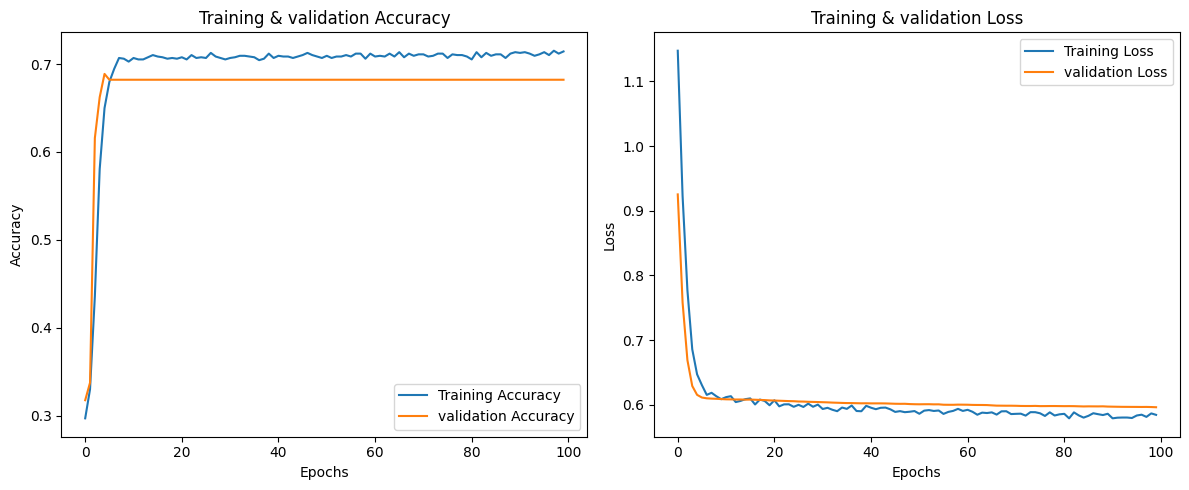

In [47]:
from keras.regularizers import l1 ,l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()
model.add(Dense(100,input_dim=12288, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))  
model.add(Dense(1,  activation='sigmoid'))


initial_learning_rate = 0.001
sgd = SGD(learning_rate=initial_learning_rate, clipnorm=1.0)
adam = Adam(learning_rate=initial_learning_rate)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lr_schedule)
history=model.fit(X_train, y_train,
          epochs=100,
          batch_size=128,
          validation_data=(X_val, y_val),
          verbose=True)

loss1, accuracy1 = model.evaluate(X_train, y_train)
print('train model loss:', loss1)
print('train model accuracy:', accuracy1)

loss, accuracy = model.evaluate(X_test, y_test)
print('Test model loss:', loss)
print('Test model accuracy:', accuracy)


# Plot training and testing accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='validation Accuracy')
plt.title('Training & validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Training & validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# change Hyperparameters 

### change layers number

Epoch 1/100
10/10 [==============================] - 2s 57ms/step - loss: 0.6820 - acc: 0.6780 - val_loss: 0.6684 - val_acc: 0.6821
Epoch 2/100
10/10 [==============================] - 0s 22ms/step - loss: 0.6601 - acc: 0.7085 - val_loss: 0.6408 - val_acc: 0.6821
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 0.6386 - acc: 0.7085 - val_loss: 0.6204 - val_acc: 0.6821
Epoch 4/100
10/10 [==============================] - 0s 31ms/step - loss: 0.6280 - acc: 0.7085 - val_loss: 0.6083 - val_acc: 0.6821
Epoch 5/100
10/10 [==============================] - 0s 23ms/step - loss: 0.6119 - acc: 0.7085 - val_loss: 0.6024 - val_acc: 0.6821
Epoch 6/100
10/10 [==============================] - 0s 27ms/step - loss: 0.6075 - acc: 0.7085 - val_loss: 0.5998 - val_acc: 0.6821
Epoch 7/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6048 - acc: 0.7085 - val_loss: 0.5990 - val_acc: 0.6821
Epoch 8/100
10/10 [==============================] - 0s 19ms/step - loss: 0.

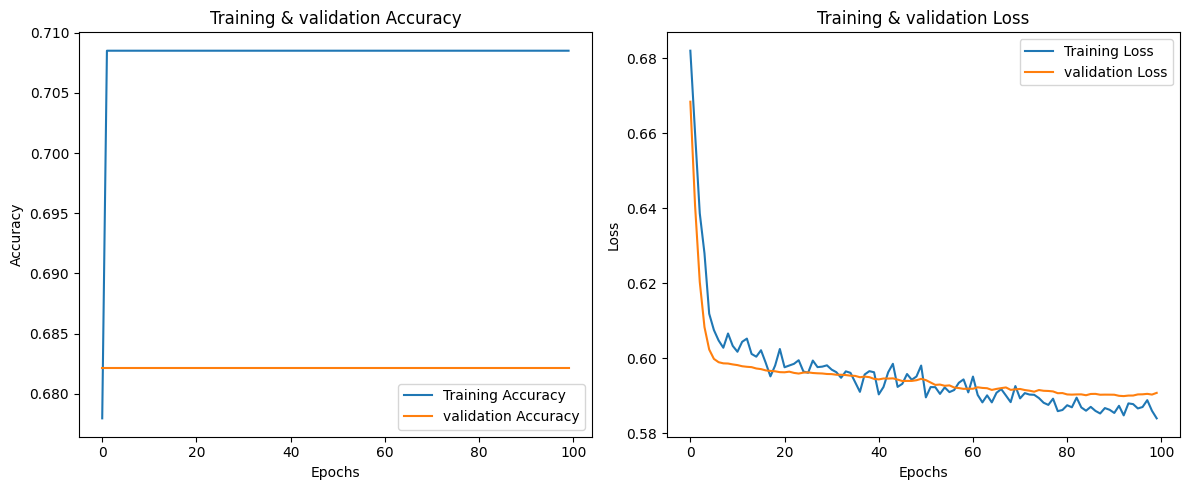

In [58]:
from keras.regularizers import l1 ,l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
model2 = Sequential()
model2.add(Dense(100,input_dim=12288, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='relu'))  
model.add(Dropout(0.2))
model2.add(Dense(2, activation='relu'))
model2.add(Dense(2, activation='relu')) 
model2.add(Dense(1,  activation='sigmoid'))


initial_learning_rate = 0.001
sgd = SGD(learning_rate=initial_learning_rate, clipnorm=1.0)
adam = Adam(learning_rate=initial_learning_rate)
model2.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lr_schedule)
history=model2.fit(X_train, y_train,
          epochs=100,
          batch_size=128,
          validation_data=(X_val, y_val),
          verbose=True)

# Evaluate the model on training, validation, and testing sets
train_loss, train_accuracy = model2.evaluate(X_train, y_train)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_accuracy)
val_loss, val_accuracy = model2.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print('Testing Loss:', test_loss)
print('Testing Accuracy:', test_accuracy)

# Plot training and testing accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='validation Accuracy')
plt.title('Training & validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Training & validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### change epochs 


Epoch 1/500
10/10 [==============================] - 2s 51ms/step - loss: 0.7827 - acc: 0.3303 - val_loss: 0.7171 - val_acc: 0.3907
Epoch 2/500
10/10 [==============================] - 0s 23ms/step - loss: 0.7262 - acc: 0.4327 - val_loss: 0.6947 - val_acc: 0.6623
Epoch 3/500
10/10 [==============================] - 0s 31ms/step - loss: 0.7033 - acc: 0.5665 - val_loss: 0.6925 - val_acc: 0.6689
Epoch 4/500
10/10 [==============================] - 0s 30ms/step - loss: 0.6954 - acc: 0.6400 - val_loss: 0.6919 - val_acc: 0.6689
Epoch 5/500
10/10 [==============================] - 0s 22ms/step - loss: 0.6935 - acc: 0.6565 - val_loss: 0.6915 - val_acc: 0.6623
Epoch 6/500
10/10 [==============================] - 0s 24ms/step - loss: 0.6923 - acc: 0.6763 - val_loss: 0.6910 - val_acc: 0.6556
Epoch 7/500
10/10 [==============================] - 0s 25ms/step - loss: 0.6912 - acc: 0.6879 - val_loss: 0.6905 - val_acc: 0.6755
Epoch 8/500
10/10 [==============================] - 0s 21ms/step - loss: 0.

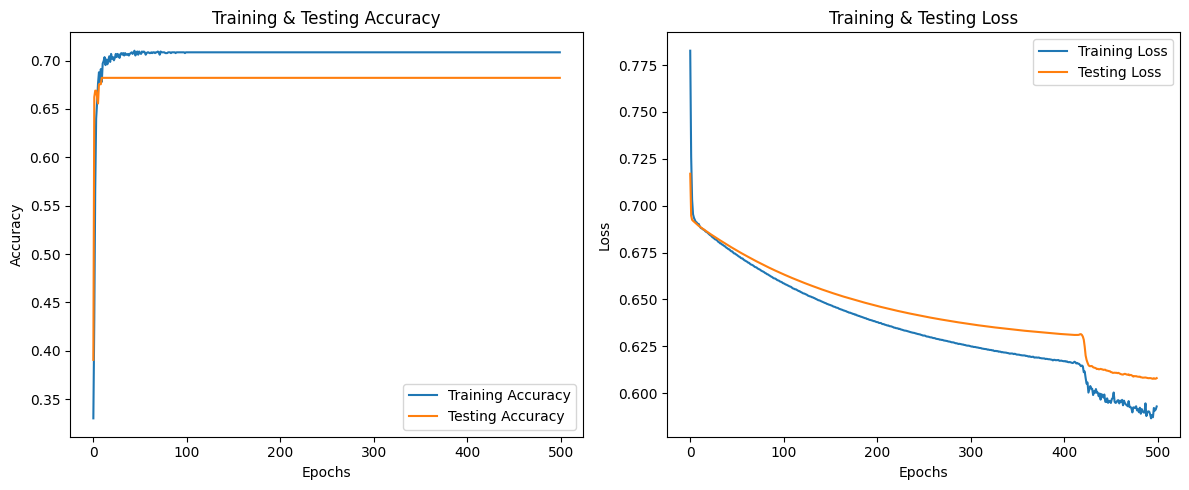

In [60]:
from keras.regularizers import l1 ,l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
model3 = Sequential()
model3.add(Dense(100,input_dim=12288, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='relu'))  
model.add(Dropout(0.2))
model3.add(Dense(2, activation='relu')) 
model3.add(Dense(1,  activation='sigmoid'))


initial_learning_rate = 0.001
sgd = SGD(learning_rate=initial_learning_rate, clipnorm=1.0)
adam = Adam(learning_rate=initial_learning_rate)
model3.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lr_schedule)
history=model3.fit(X_train, y_train,
          epochs=500,
          batch_size=128,
          validation_data=(X_val, y_val),
          verbose=True)

loss1, accuracy1 = model3.evaluate(X_train, y_train)
print('train model loss:', loss1)
print('train model accuracy:', accuracy1)
val_loss, val_accuracy = model3.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)
loss, accuracy = model3.evaluate(X_test, y_test)
print('Test model loss:', loss)
print('Test model accuracy:', accuracy)


# Plot training and testing accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='validation Accuracy')
plt.title('Training & validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Training & validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### change batch size

Epoch 1/200
13/13 [==============================] - 2s 44ms/step - loss: 0.8291 - acc: 0.4360 - val_loss: 0.7043 - val_acc: 0.5695
Epoch 2/200
13/13 [==============================] - 0s 19ms/step - loss: 0.6951 - acc: 0.6078 - val_loss: 0.6573 - val_acc: 0.6755
Epoch 3/200
13/13 [==============================] - 0s 19ms/step - loss: 0.6542 - acc: 0.6862 - val_loss: 0.6329 - val_acc: 0.6887
Epoch 4/200
13/13 [==============================] - 0s 20ms/step - loss: 0.6409 - acc: 0.6920 - val_loss: 0.6212 - val_acc: 0.6821
Epoch 5/200
13/13 [==============================] - 0s 20ms/step - loss: 0.6245 - acc: 0.7011 - val_loss: 0.6145 - val_acc: 0.6821
Epoch 6/200
13/13 [==============================] - 0s 21ms/step - loss: 0.6179 - acc: 0.7019 - val_loss: 0.6108 - val_acc: 0.6821
Epoch 7/200
13/13 [==============================] - 0s 23ms/step - loss: 0.6102 - acc: 0.7077 - val_loss: 0.6093 - val_acc: 0.6821
Epoch 8/200
13/13 [==============================] - 0s 19ms/step - loss: 0.

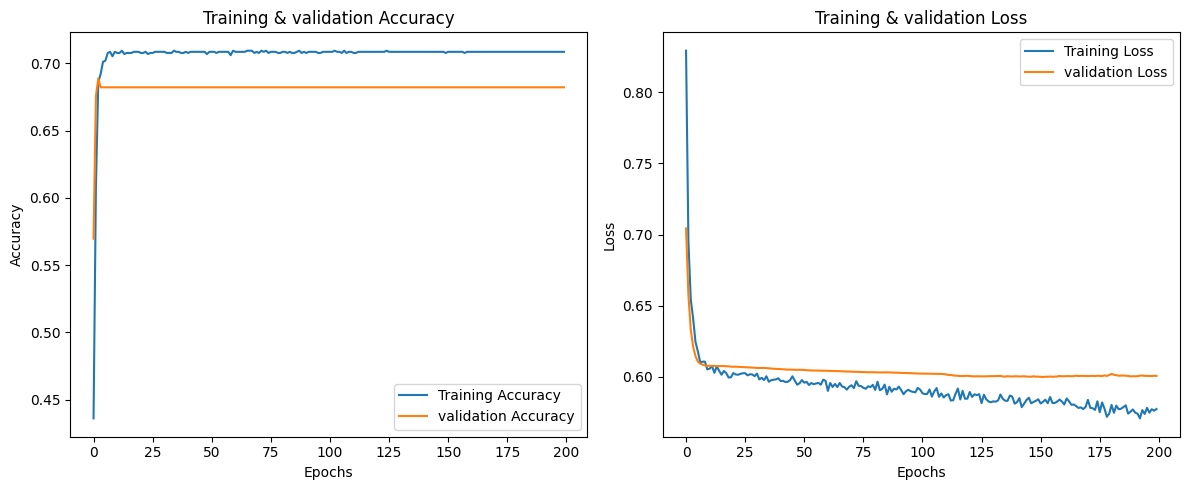

In [64]:
from keras.regularizers import l1 ,l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
model4 = Sequential()
model4.add(Dense(100,input_dim=12288, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='relu'))  
model.add(Dropout(0.2))
model4.add(Dense(2, activation='relu')) 
model4.add(Dense(1,  activation='sigmoid'))


initial_learning_rate = 0.001
sgd = SGD(learning_rate=initial_learning_rate, clipnorm=1.0)
adam = Adam(learning_rate=initial_learning_rate)
model4.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lr_schedule)
history=model4.fit(X_train, y_train,
          epochs=200,
          batch_size=100,
          validation_data=(X_val, y_val),
          verbose=True)

loss1, accuracy1 = model4.evaluate(X_train, y_train)
print('train model loss:', loss1)
print('train model accuracy:', accuracy1)
val_loss, val_accuracy = model4.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)
loss, accuracy = model4.evaluate(X_test, y_test)
print('Test model loss:', loss)
print('Test model accuracy:', accuracy)



# Plot training and testing accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='validation Accuracy')
plt.title('Training & validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Training & validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## cahnge optimizers

Epoch 1/100
5/5 [==============================] - 1s 75ms/step - loss: 0.6939 - acc: 0.6311 - val_loss: 0.6925 - val_acc: 0.7063
Epoch 2/100
5/5 [==============================] - 0s 36ms/step - loss: 0.6921 - acc: 0.7093 - val_loss: 0.6916 - val_acc: 0.7063
Epoch 3/100
5/5 [==============================] - 0s 34ms/step - loss: 0.6912 - acc: 0.7093 - val_loss: 0.6906 - val_acc: 0.7063
Epoch 4/100
5/5 [==============================] - 0s 33ms/step - loss: 0.6902 - acc: 0.7093 - val_loss: 0.6896 - val_acc: 0.7063
Epoch 5/100
5/5 [==============================] - 0s 33ms/step - loss: 0.6892 - acc: 0.7093 - val_loss: 0.6887 - val_acc: 0.7063
Epoch 6/100
5/5 [==============================] - 0s 33ms/step - loss: 0.6882 - acc: 0.7093 - val_loss: 0.6877 - val_acc: 0.7063
Epoch 7/100
5/5 [==============================] - 0s 35ms/step - loss: 0.6873 - acc: 0.7093 - val_loss: 0.6867 - val_acc: 0.7063
Epoch 8/100
5/5 [==============================] - 0s 34ms/step - loss: 0.6863 - acc: 0.70

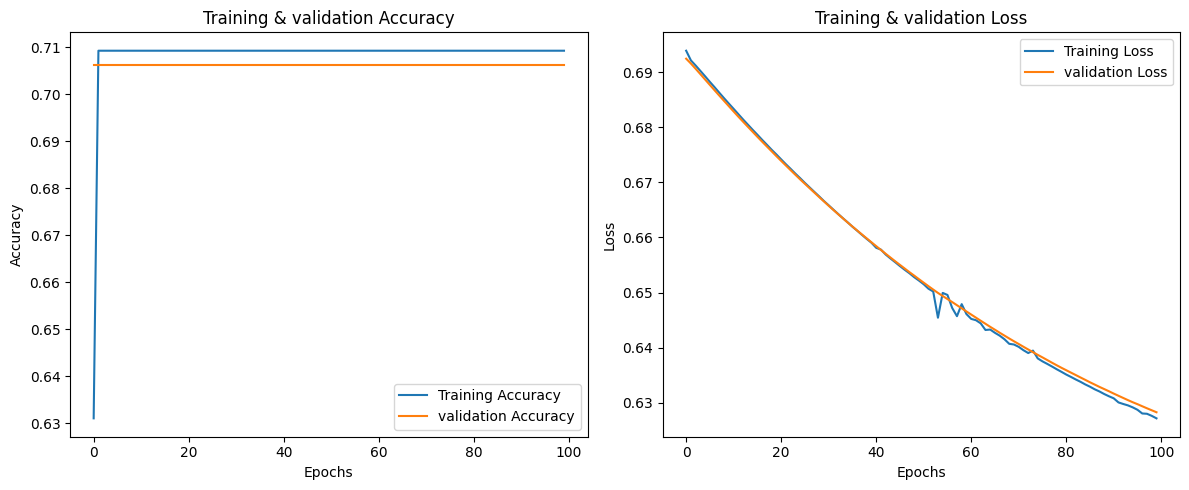

In [75]:
from keras.regularizers import l1 ,l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
model5 = Sequential()
model5.add(Dense(100,input_dim=12288, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation='relu'))  
# model.add(Dropout(0.2))
model5.add(Dense(2, activation='relu')) 
model5.add(Dense(1,  activation='sigmoid'))


initial_learning_rate = 0.001
sgd = SGD(learning_rate=initial_learning_rate, clipnorm=1.0)
adam = Adam(learning_rate=initial_learning_rate, clipnorm=1.0)
model5.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lr_schedule)
history=model5.fit(X_train, y_train,
          epochs=100,
          batch_size=200,
          validation_data=(X_val, y_val),
          verbose=True)

loss1, accuracy1 = model5.evaluate(X_train, y_train)
print('train model loss:', loss1)
print('train model accuracy:', accuracy1)
val_loss, val_accuracy = model5.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)
loss, accuracy = model5.evaluate(X_test, y_test)
print('Test model loss:', loss)
print('Test model accuracy:', accuracy)



# Plot training and testing accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='validation Accuracy')
plt.title('Training & validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Training & validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# change training set size

#### set test size = 0.4

Training set shape: (908, 12288)
Validation set shape: (303, 12288)
Testing set shape: (303, 12288)
Training set shape: (908, 1)
Validation set shape: (303, 1)
Testing set shape: (303, 1)
Epoch 1/200
8/8 [==============================] - 2s 74ms/step - loss: 0.9651 - acc: 0.3018 - val_loss: 0.7902 - val_acc: 0.3003
Epoch 2/200
8/8 [==============================] - 0s 27ms/step - loss: 0.8176 - acc: 0.3260 - val_loss: 0.7182 - val_acc: 0.4323
Epoch 3/200
8/8 [==============================] - 0s 27ms/step - loss: 0.7671 - acc: 0.4130 - val_loss: 0.6985 - val_acc: 0.5776
Epoch 4/200
8/8 [==============================] - 0s 27ms/step - loss: 0.7257 - acc: 0.4604 - val_loss: 0.6938 - val_acc: 0.6667
Epoch 5/200
8/8 [==============================] - 0s 28ms/step - loss: 0.7058 - acc: 0.5529 - val_loss: 0.6923 - val_acc: 0.6700
Epoch 6/200
8/8 [==============================] - 0s 27ms/step - loss: 0.6999 - acc: 0.6156 - val_loss: 0.6915 - val_acc: 0.6865
Epoch 7/200
8/8 [===============

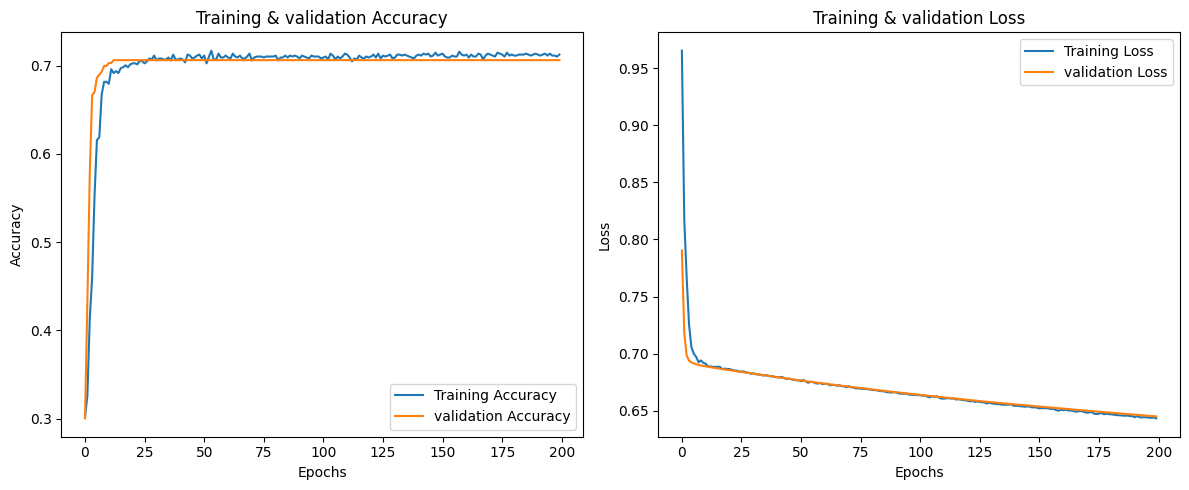

In [74]:
from sklearn.model_selection import train_test_split

# Concatenate the makeup and non-makeup data
all_images = np.concatenate([makeup_images, no_makeup_images])
all_labels = np.concatenate([makeup_labels, no_makeup_labels])

# Split the dataset 
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/2, random_state=42)

# Flatten and normalize
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_val = X_val.reshape(X_val.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)
print("Training set shape:", y_train.shape)
print("Validation set shape:", y_val.shape)
print("Testing set shape:", y_test.shape)



# ================================================================================================

from keras.regularizers import l1 ,l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
model6 = Sequential()
model6.add(Dense(100,input_dim=12288, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(10, activation='relu'))  
# model.add(Dropout(0.2))
model6.add(Dense(2, activation='relu')) 
model6.add(Dense(1,  activation='sigmoid'))


initial_learning_rate = 0.001
sgd = SGD(learning_rate=initial_learning_rate, clipnorm=1.0)
adam = Adam(learning_rate=initial_learning_rate)
model6.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lr_schedule)
history=model6.fit(X_train, y_train,
          epochs=200,
          batch_size=128,
          validation_data=(X_val, y_val),
          verbose=True)

loss1, accuracy1 = model6.evaluate(X_train, y_train)
print('train model loss:', loss1)
print('train model accuracy:', accuracy1)
val_loss, val_accuracy = model6.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)
loss, accuracy = model6.evaluate(X_test, y_test)
print('Test model loss:', loss)
print('Test model accuracy:', accuracy)

# Plot training and testing accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='validation Accuracy')
plt.title('Training & validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Training & validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### set test size = 0.1

Training set shape: (1362, 12288)
Validation set shape: (76, 12288)
Testing set shape: (76, 12288)
Training set shape: (1362, 1)
Validation set shape: (76, 1)
Testing set shape: (76, 1)
Epoch 1/200
11/11 [==============================] - 1s 30ms/step - loss: 0.9841 - acc: 0.3297 - val_loss: 0.8180 - val_acc: 0.3421
Epoch 2/200
11/11 [==============================] - 0s 16ms/step - loss: 0.8016 - acc: 0.4214 - val_loss: 0.7177 - val_acc: 0.5526
Epoch 3/200
11/11 [==============================] - 0s 16ms/step - loss: 0.6995 - acc: 0.5969 - val_loss: 0.6813 - val_acc: 0.6316
Epoch 4/200
11/11 [==============================] - 0s 16ms/step - loss: 0.6686 - acc: 0.6696 - val_loss: 0.6584 - val_acc: 0.6579
Epoch 5/200
11/11 [==============================] - 0s 16ms/step - loss: 0.6476 - acc: 0.6931 - val_loss: 0.6463 - val_acc: 0.6579
Epoch 6/200
11/11 [==============================] - 0s 18ms/step - loss: 0.6255 - acc: 0.7019 - val_loss: 0.6422 - val_acc: 0.6579
Epoch 7/200
11/11 [===

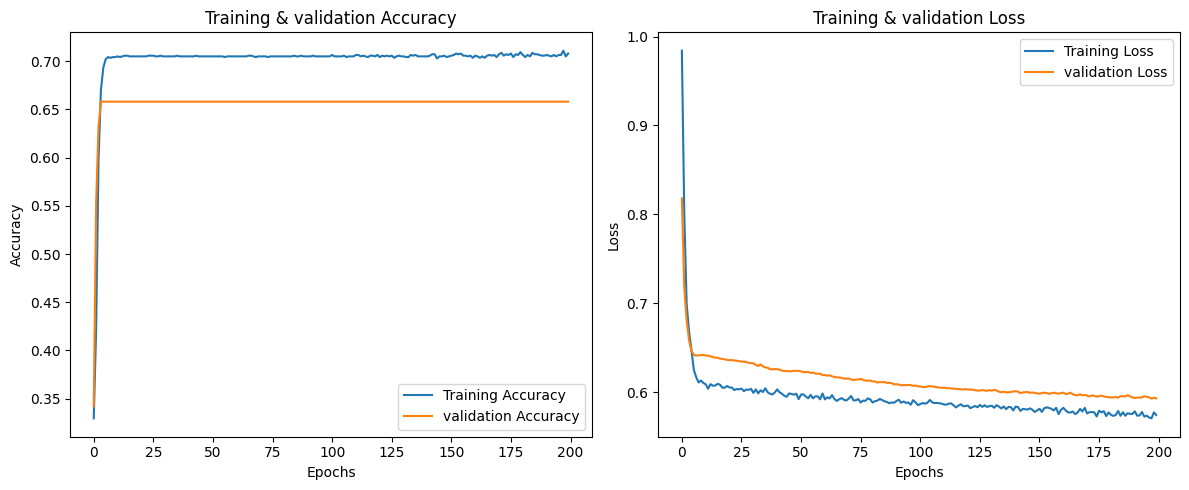

In [76]:
from sklearn.model_selection import train_test_split

# Concatenate the makeup and non-makeup data
all_images = np.concatenate([makeup_images, no_makeup_images])
all_labels = np.concatenate([makeup_labels, no_makeup_labels])

# Split the dataset 
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/2, random_state=42)

# Flatten and normalize
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_val = X_val.reshape(X_val.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)
print("Training set shape:", y_train.shape)
print("Validation set shape:", y_val.shape)
print("Testing set shape:", y_test.shape)



# ================================================================================================

from keras.regularizers import l1 ,l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
model7 = Sequential()
model7.add(Dense(100,input_dim=12288, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(10, activation='relu'))  
# model.add(Dropout(0.2))
model7.add(Dense(2, activation='relu')) 
model7.add(Dense(1,  activation='sigmoid'))


initial_learning_rate = 0.001
sgd = SGD(learning_rate=initial_learning_rate, clipnorm=1.0)
adam = Adam(learning_rate=initial_learning_rate)
model7.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lr_schedule)
history=model7.fit(X_train, y_train,
          epochs=200,
          batch_size=128,
          validation_data=(X_val, y_val),
          verbose=True)

loss1, accuracy1 = model7.evaluate(X_train, y_train)
print('train model loss:', loss1)
print('train model accuracy:', accuracy1)
val_loss, val_accuracy = model7.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)
loss, accuracy = model7.evaluate(X_test, y_test)
print('Test model loss:', loss)
print('Test model accuracy:', accuracy)


# Plot training and testing accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='validation Accuracy')
plt.title('Training & validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Training & validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()